In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as scio

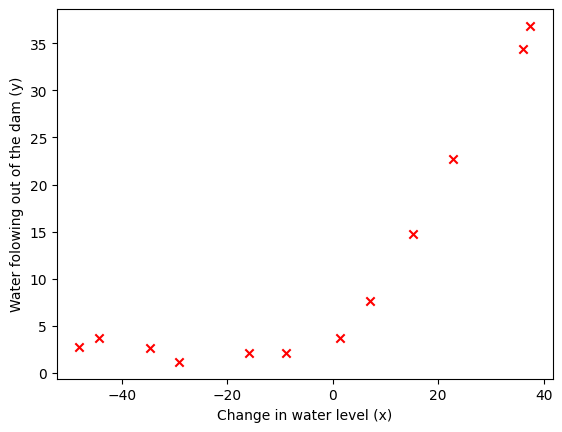

In [8]:
# Load from ex5data1:
data = scio.loadmat('ex5data1.mat')
X = data['X']
y = data['y'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()

m = y.size
n=X.shape[1]
# Plot training data
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.show()

In [41]:
def linear_reg_cost_function(theta, x, y, lmd):
    # Initialize some useful values
    m = y.size
    cost = 0
    grad = np.zeros(theta.shape)
    h=np.dot(x,theta)
    cost=(1/(2*m))*np.sum((h-y)**2)+(lmd/m)*np.sum(theta[1:])
    E=np.subtract(h,y)
    grad=(1/m)*np.dot(x.T,E)
    grad[1:]=grad[1:]+(lmd/m)*theta[1:]

    return cost , grad

In [42]:
theta = np.ones(2)
cost , grad = linear_reg_cost_function(theta,np.c_[np.ones(m), X], y, 1)

In [44]:
cost

np.float64(304.0348588869309)

In [46]:
def train_linear_reg(x, y, lmd):
    initial_theta = np.ones(x.shape[1])

    def cost_func(t):
        return linear_reg_cost_function(t, x, y, lmd)[0]

    def grad_func(t):
        return linear_reg_cost_function(t, x, y, lmd)[1]

    theta, *unused = opt.fmin_cg(cost_func, initial_theta, grad_func, maxiter=200, disp=False,full_output=True)

    return theta

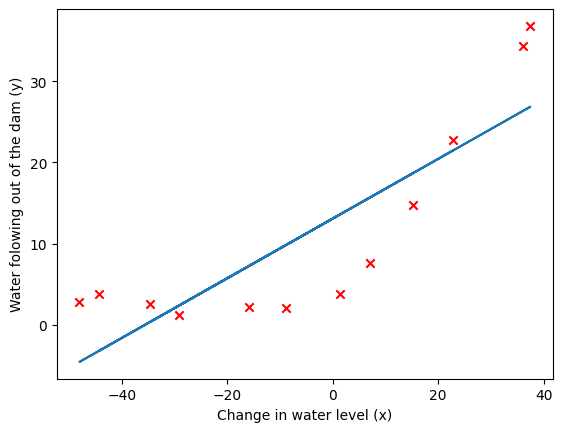

In [47]:
# ===================== Part 4: Train Linear Regression =====================
# Train linear regression with lambda = 0
lmd = 0

theta = train_linear_reg(np.c_[np.ones(m), X], y, lmd)

# Plot fit over the data
plt.figure()
plt.plot(X, np.dot(np.c_[np.ones(m), X], theta))
plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.show()

In [37]:
# ===================== Part 5: Learning Curve for Linear Regression =====================

In [49]:
def learning_curve(X, y, Xval, yval, lmd):
    # Number of training examples
    m = X.shape[0]

    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(m):
        xi = X[:i+1]
        yi = y[:i+1]
        theta = train_linear_reg(xi, yi, lmd)

        error_train[i] = linear_reg_cost_function(theta, xi, yi, 0)[0]
        error_val[i] = linear_reg_cost_function(theta, Xval, yval, 0)[0]

    # ==========================================================

    return error_train, error_val

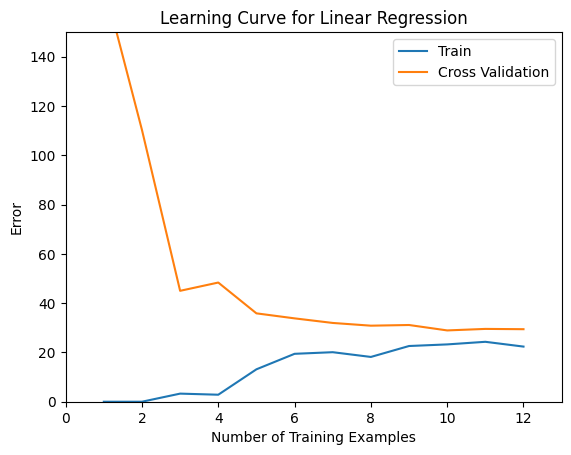

In [59]:
lmd = 0
error_train, error_val = learning_curve(np.c_[np.ones(m), X], y, np.c_[np.ones(Xval.shape[0]), Xval], yval, lmd)

plt.figure()
plt.plot(np.arange(1,m+1), error_train, np.arange(1,m+1), error_val)
plt.title('Learning Curve for Linear Regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
plt.show()


In [60]:
# ===================== Part 6 : Feature Mapping for Polynomial Regression =====================

In [61]:
def feature_normalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [73]:
def poly_features(X, p):
    # You need to return the following variable correctly.
    # X is a vector
    X=X.flatten()
    X_poly = np.zeros((X.size, p))
    for i in range(1,p+1):
        X_poly[:,i-1]=X**i

    return X_poly

In [77]:
# Map X onto Polynomial Features and Normalize
p=5
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.c_[np.ones(m), X_poly]

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = poly_features(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.c_[np.ones(X_poly_test.shape[0]), X_poly_test]

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = poly_features(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.c_[np.ones(X_poly_val.shape[0]), X_poly_val]

In [81]:
# ===================== Part 7 : Learning Curve for Polynomial Regression =====================

In [84]:
def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05)

    X_poly = poly_features(x, p)
    X_poly -= mu
    X_poly /= sigma

    X_poly = np.c_[np.ones(x.size), X_poly]

    plt.plot(x, np.dot(X_poly, theta))

(np.float64(0.0), np.float64(13.0), np.float64(0.0), np.float64(150.0))

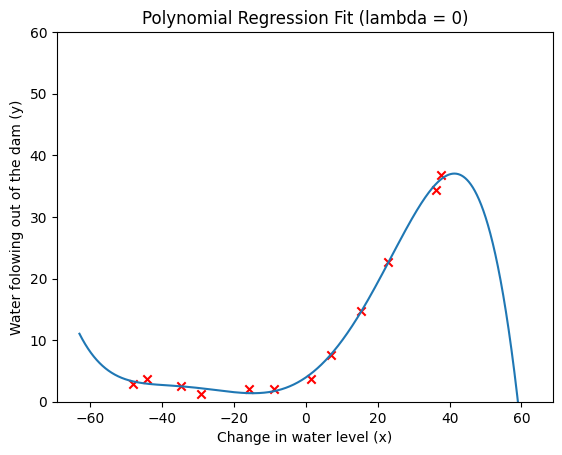

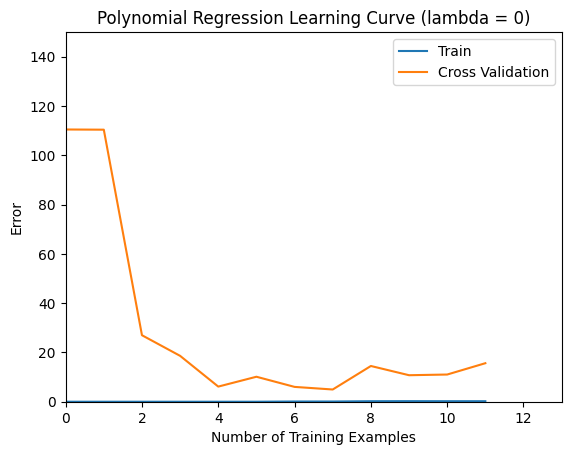

In [89]:
lmd = 0
theta = train_linear_reg(X_poly, y, lmd)

# Plot trainint data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (lambda = {})'.format(lmd))

error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lmd)
plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(lmd))
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

In [86]:
# ===================== Part 8 : Validation for Selecting Lambda =====================

In [91]:
def validation_curve(X, y, Xval, yval):
    # Selected values of lambda (don't change this)
    lambda_vec = np.array([0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros(lambda_vec.size)
    error_val = np.zeros(lambda_vec.size)

    for i in range(len(lambda_vec)):
        
        theta = train_linear_reg(X, y, lambda_vec[i])
        error_train[i] = linear_reg_cost_function(theta, X, y, lambda_vec[i])[0]
        error_val[i] = linear_reg_cost_function(theta, Xval, yval, lambda_vec[i])[0]

    return lambda_vec, error_train, error_val

Text(0, 0.5, 'Error')

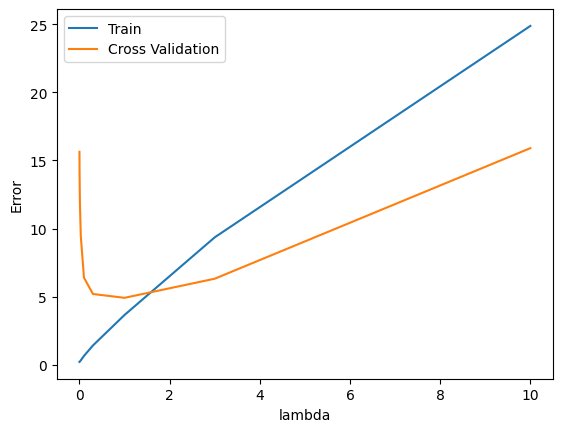

In [92]:
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

plt.figure()
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

In [93]:
# ===================== Part 7 : Learning Curve for Polynomial Regression using optimal lambda ====================

(np.float64(0.0), np.float64(13.0), np.float64(0.0), np.float64(150.0))

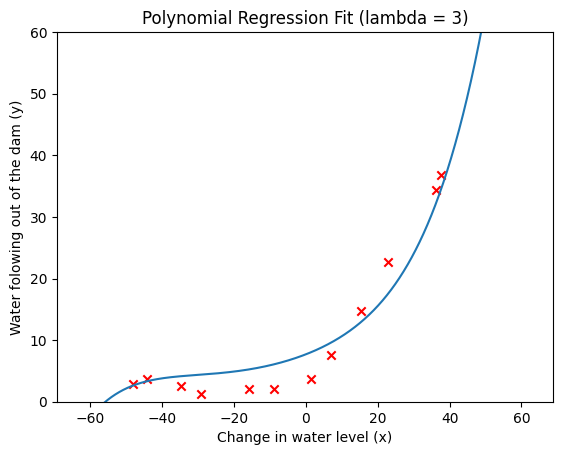

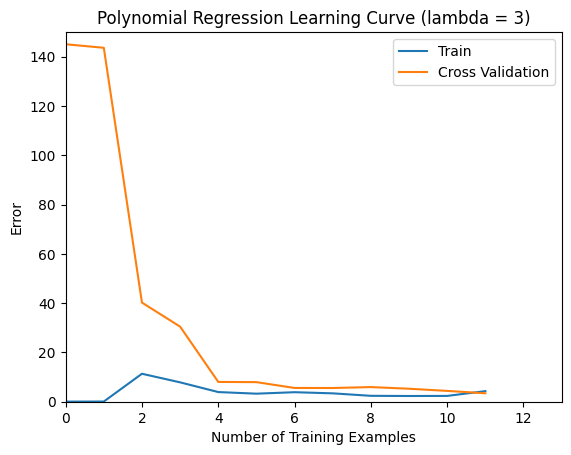

In [95]:
lmd = 3
theta = train_linear_reg(X_poly, y, lmd)

# Plot trainint data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (lambda = {})'.format(lmd))

error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lmd)
plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(lmd))
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])